In [3]:
import pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt

In [5]:
path = "/content/drive/MyDrive/ta/"

In [6]:
dataset = pandas.read_csv(path+ "gabungan_data_jakarta_barat.csv", sep=";", usecols=[1])

In [7]:
dataset

,harga
0,9920
1,9920
2,9920
3,9920
4,9920
...,...
1150,11100
1151,11100
1152,11100
1153,11100


<Figure size 864x576 with 0 Axes>

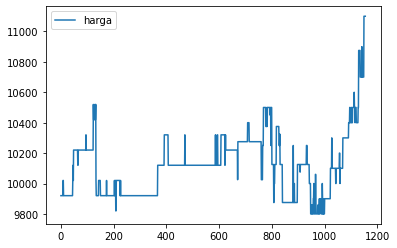

In [8]:
plt.figure(figsize=(12, 8))
dataset.plot();

In [9]:
# Split the dataset into train and test set
train_size = int(dataset.shape[0] * 0.70)
train_df, test_df = dataset.iloc[:train_size, :], dataset.iloc[train_size:, :]

In [10]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    m = len(dataset)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(dataset[i - look_back: i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [11]:
look_back = 1
X_train, y_train = create_dataset(train_df.values, look_back=look_back)
X_test, y_test = create_dataset(test_df.values, look_back=look_back)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# **SKEMA** PENGUJIAN DENGAN JUMLAH Epoch

---









In [ ]:
model12 = Sequential()
model12.add(Dense(64, input_dim=look_back, activation='relu'))
model12.add(Dense(8, activation='relu'))
model12.add(Dense(1))
model12.compile(loss='mean_squared_error', optimizer='adam')
model12.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 926548.0625 - 1s/epoch - 3ms/step
Epoch 2/100
404/404 - 1s - loss: 2567.6130 - 532ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 2686.7981 - 523ms/epoch - 1ms/step
Epoch 4/100
404/404 - 1s - loss: 2892.1267 - 514ms/epoch - 1ms/step
Epoch 5/100
404/404 - 0s - loss: 2960.6846 - 499ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 3561.5632 - 541ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 3562.4624 - 533ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 3835.1714 - 517ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 3467.2432 - 532ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 3673.0505 - 511ms/epoch - 1ms/step
Epoch 11/100
404/404 - 1s - loss: 3960.0037 - 511ms/epoch - 1ms/step
Epoch 12/100
404/404 - 1s - loss: 4774.8521 - 910ms/epoch - 2ms/step
Epoch 13/100
404/404 - 1s - loss: 4182.8740 - 1s/epoch - 3ms/step
Epoch 14/100
404/404 - 1s - loss: 5151.2290 - 1s/epoch - 3ms/step
Epoch 15/100
404/404 - 1s - loss: 5016.6899 - 870m

In [ ]:
trainScore = model12.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model12.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 2364.8660
Train Score: 2364.87 MSE (48.63 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5146.7817
Test Score: 5146.78 MSE (71.74 RMSE)


11/11 [==============================] - 0s 2ms/step


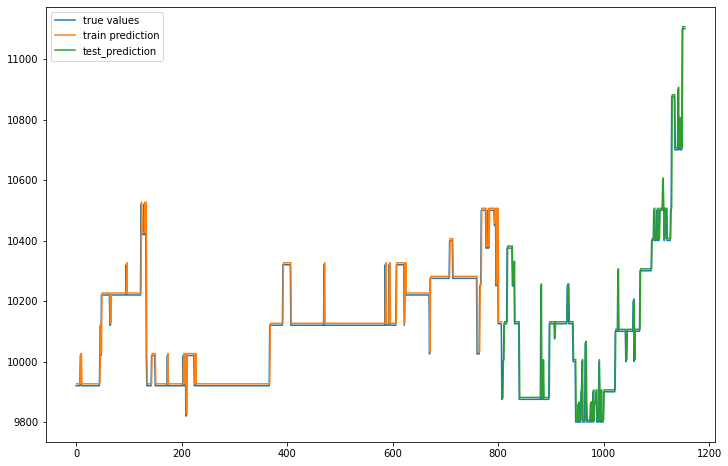

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model12.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model12.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [10026.423 ],
       [10026.423 ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [ 9926.37  ],
       [10026.423 ],
       [10126.479 ],
       [10026

In [ ]:
test_prediction

array([[ 9881.344 ],
       [10006.412 ],
       [10006.412 ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10381.616 ],
       [10381.616 ],
       [10381.616 ],
       [10381.616 ],
       [10381.616 ],
       [10381.616 ],
       [10381.616 ],
       [10381.616 ],
       [10381.616 ],
       [10381.616 ],
       [10256.549 ],
       [10256.549 ],
       [10256.549 ],
       [10331.59  ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10131.481 ],
       [10131.48  ],
       [10131.48  ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881.344 ],
       [ 9881

In [ ]:
model21 = Sequential()
model21.add(Dense(64, input_dim=look_back, activation='relu'))
model21.add(Dense(8, activation='relu'))
model21.add(Dense(1))
model21.compile(loss='mean_squared_error', optimizer='adam')
model21.fit(X_train, y_train, epochs=150, batch_size=2, verbose=2)

Epoch 1/150
404/404 - 1s - loss: 5023565.5000 - 1s/epoch - 3ms/step
Epoch 2/150
404/404 - 1s - loss: 2440.0979 - 541ms/epoch - 1ms/step
Epoch 3/150
404/404 - 1s - loss: 2479.8401 - 522ms/epoch - 1ms/step
Epoch 4/150
404/404 - 1s - loss: 2563.6179 - 523ms/epoch - 1ms/step
Epoch 5/150
404/404 - 1s - loss: 2531.9102 - 535ms/epoch - 1ms/step
Epoch 6/150
404/404 - 1s - loss: 2697.9111 - 589ms/epoch - 1ms/step
Epoch 7/150
404/404 - 1s - loss: 2707.0232 - 548ms/epoch - 1ms/step
Epoch 8/150
404/404 - 1s - loss: 2997.4062 - 523ms/epoch - 1ms/step
Epoch 9/150
404/404 - 1s - loss: 2725.6887 - 531ms/epoch - 1ms/step
Epoch 10/150
404/404 - 1s - loss: 3514.5261 - 527ms/epoch - 1ms/step
Epoch 11/150
404/404 - 1s - loss: 3106.1760 - 519ms/epoch - 1ms/step
Epoch 12/150
404/404 - 1s - loss: 3517.6680 - 545ms/epoch - 1ms/step
Epoch 13/150
404/404 - 1s - loss: 3400.3320 - 518ms/epoch - 1ms/step
Epoch 14/150
404/404 - 1s - loss: 3386.4944 - 533ms/epoch - 1ms/step
Epoch 15/150
404/404 - 1s - loss: 4203.9165

In [ ]:
trainScore = model21.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model21.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 6174.0239
Train Score: 6174.02 MSE (78.57 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 8572.1045
Test Score: 8572.10 MSE (92.59 RMSE)


11/11 [==============================] - 0s 2ms/step


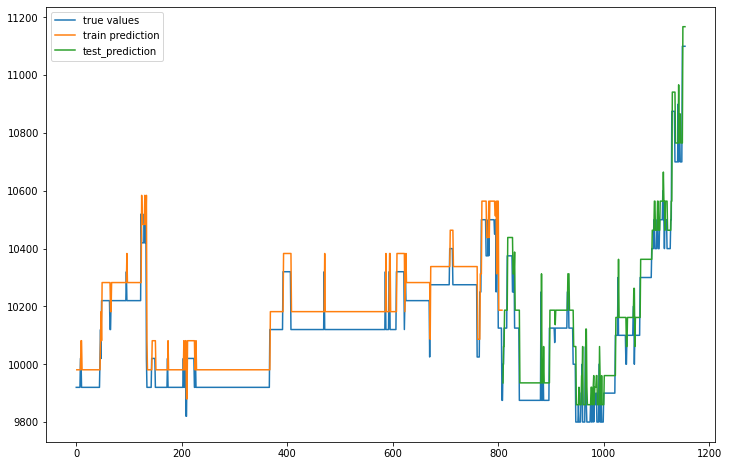

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model21.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model21.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [10081.343],
       [10081.343],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [ 9980.746],
       [10081.343],
       [10181.938],
       [10081.343],
       [10282.536],
       [10282.536],


In [ ]:
test_prediction

array([[ 9935.478],
       [10061.223],
       [10061.223],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [10438.462],
       [10438.462],
       [10438.462],
       [10438.462],
       [10438.462],
       [10438.462],
       [10438.462],
       [10438.462],
       [10438.462],
       [10438.462],
       [10312.716],
       [10312.716],
       [10312.716],
       [10388.163],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [10186.969],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],
       [ 9935.478],


In [ ]:
model22 = Sequential()
model22.add(Dense(64, input_dim=look_back, activation='relu'))
model22.add(Dense(8, activation='relu'))
model22.add(Dense(1))
model22.compile(loss='mean_squared_error', optimizer='adam')
model22.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
404/404 - 2s - loss: 4300143.5000 - 2s/epoch - 4ms/step
Epoch 2/200
404/404 - 1s - loss: 2453.7556 - 754ms/epoch - 2ms/step
Epoch 3/200
404/404 - 1s - loss: 2518.9180 - 801ms/epoch - 2ms/step
Epoch 4/200
404/404 - 1s - loss: 2641.1655 - 598ms/epoch - 1ms/step
Epoch 5/200
404/404 - 1s - loss: 2602.3201 - 546ms/epoch - 1ms/step
Epoch 6/200
404/404 - 1s - loss: 2664.0574 - 576ms/epoch - 1ms/step
Epoch 7/200
404/404 - 1s - loss: 2717.1421 - 516ms/epoch - 1ms/step
Epoch 8/200
404/404 - 1s - loss: 3244.1311 - 531ms/epoch - 1ms/step
Epoch 9/200
404/404 - 1s - loss: 3068.4065 - 504ms/epoch - 1ms/step
Epoch 10/200
404/404 - 1s - loss: 3142.9399 - 518ms/epoch - 1ms/step
Epoch 11/200
404/404 - 1s - loss: 3062.8040 - 514ms/epoch - 1ms/step
Epoch 12/200
404/404 - 1s - loss: 4067.8689 - 545ms/epoch - 1ms/step
Epoch 13/200
404/404 - 1s - loss: 4373.5386 - 549ms/epoch - 1ms/step
Epoch 14/200
404/404 - 1s - loss: 4276.7485 - 550ms/epoch - 1ms/step
Epoch 15/200
404/404 - 1s - loss: 4145.0581

In [ ]:
trainScore = model22.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model22.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 2601.5530
Train Score: 2601.55 MSE (51.01 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5552.3745
Test Score: 5552.37 MSE (74.51 RMSE)


11/11 [==============================] - 0s 1ms/step


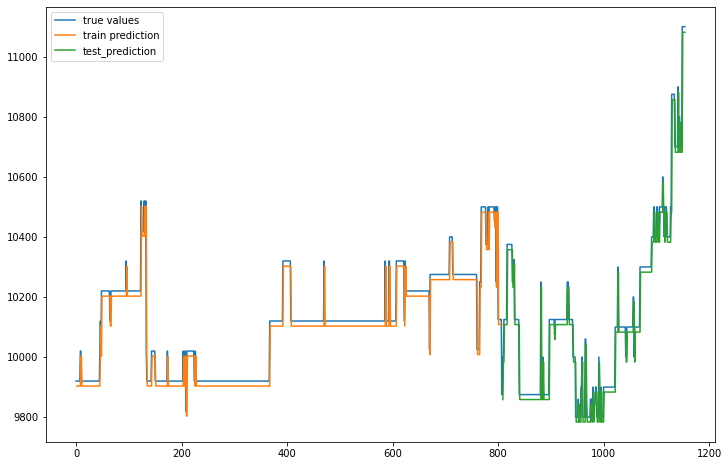

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model22.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model22.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [10003.242],
       [10003.242],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [ 9903.426],
       [10003.242],
       [10103.059],
       [10003.242],
       [10202.874],
       [10202.874],


In [ ]:
test_prediction

array([[ 9858.509],
       [ 9983.278],
       [ 9983.278],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [10357.589],
       [10357.589],
       [10357.589],
       [10357.589],
       [10357.589],
       [10357.589],
       [10357.589],
       [10357.589],
       [10357.589],
       [10357.589],
       [10232.819],
       [10232.819],
       [10232.819],
       [10307.681],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [10108.049],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],
       [ 9858.509],


In [ ]:
model23 = Sequential()
model23.add(Dense(64, input_dim=look_back, activation='relu'))
model23.add(Dense(8, activation='relu'))
model23.add(Dense(1))
model23.compile(loss='mean_squared_error', optimizer='adam')
model23.fit(X_train, y_train, epochs=300, batch_size=2, verbose=2)

Epoch 1/300
404/404 - 2s - loss: 17312540.0000 - 2s/epoch - 4ms/step
Epoch 2/300
404/404 - 1s - loss: 2373.6892 - 571ms/epoch - 1ms/step
Epoch 3/300
404/404 - 1s - loss: 2395.5967 - 550ms/epoch - 1ms/step
Epoch 4/300
404/404 - 1s - loss: 2388.6577 - 759ms/epoch - 2ms/step
Epoch 5/300
404/404 - 1s - loss: 2453.2324 - 841ms/epoch - 2ms/step
Epoch 6/300
404/404 - 1s - loss: 2406.7612 - 936ms/epoch - 2ms/step
Epoch 7/300
404/404 - 1s - loss: 2484.2202 - 791ms/epoch - 2ms/step
Epoch 8/300
404/404 - 1s - loss: 2488.9634 - 773ms/epoch - 2ms/step
Epoch 9/300
404/404 - 1s - loss: 2514.8193 - 533ms/epoch - 1ms/step
Epoch 10/300
404/404 - 1s - loss: 2621.4329 - 540ms/epoch - 1ms/step
Epoch 11/300
404/404 - 1s - loss: 2672.3677 - 572ms/epoch - 1ms/step
Epoch 12/300
404/404 - 1s - loss: 2749.3130 - 522ms/epoch - 1ms/step
Epoch 13/300
404/404 - 1s - loss: 2636.5833 - 509ms/epoch - 1ms/step
Epoch 14/300
404/404 - 1s - loss: 2706.0266 - 532ms/epoch - 1ms/step
Epoch 15/300
404/404 - 1s - loss: 2989.503

In [ ]:
trainScore = model23.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model23.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 2913.8276
Train Score: 2913.83 MSE (53.98 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5920.3818
Test Score: 5920.38 MSE (76.94 RMSE)


11/11 [==============================] - 0s 2ms/step


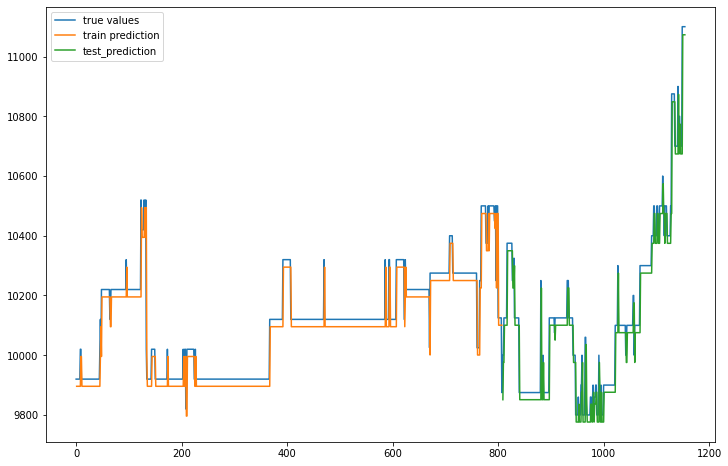

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model23.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model23.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9995.721],
       [ 9995.721],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9895.983],
       [ 9995.721],
       [10095.458],
       [ 9995.721],
       [10195.195],
       [10195.195],


In [ ]:
test_prediction

array([[ 9851.102],
       [ 9975.773],
       [ 9975.773],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [10349.787],
       [10349.787],
       [10349.787],
       [10349.787],
       [10349.787],
       [10349.787],
       [10349.787],
       [10349.787],
       [10349.787],
       [10349.787],
       [10225.115],
       [10225.115],
       [10225.115],
       [10299.919],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [10100.444],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],
       [ 9851.102],


In [ ]:
model24 = Sequential()
model24.add(Dense(64, input_dim=look_back, activation='relu'))
model24.add(Dense(8, activation='relu'))
model24.add(Dense(1))
model24.compile(loss='mean_squared_error', optimizer='adam')
model24.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
404/404 - 1s - loss: 8852357.0000 - 1s/epoch - 3ms/step
Epoch 2/400
404/404 - 1s - loss: 2464.4028 - 519ms/epoch - 1ms/step
Epoch 3/400
404/404 - 1s - loss: 2473.1885 - 532ms/epoch - 1ms/step
Epoch 4/400
404/404 - 1s - loss: 2650.1741 - 512ms/epoch - 1ms/step
Epoch 5/400
404/404 - 1s - loss: 2564.0728 - 543ms/epoch - 1ms/step
Epoch 6/400
404/404 - 1s - loss: 2660.9092 - 515ms/epoch - 1ms/step
Epoch 7/400
404/404 - 1s - loss: 2683.5188 - 518ms/epoch - 1ms/step
Epoch 8/400
404/404 - 1s - loss: 2779.5752 - 510ms/epoch - 1ms/step
Epoch 9/400
404/404 - 1s - loss: 2895.8816 - 523ms/epoch - 1ms/step
Epoch 10/400
404/404 - 1s - loss: 3168.6982 - 648ms/epoch - 2ms/step
Epoch 11/400
404/404 - 1s - loss: 3075.0391 - 795ms/epoch - 2ms/step
Epoch 12/400
404/404 - 1s - loss: 3341.3567 - 801ms/epoch - 2ms/step
Epoch 13/400
404/404 - 1s - loss: 3519.7600 - 777ms/epoch - 2ms/step
Epoch 14/400
404/404 - 1s - loss: 3876.0488 - 732ms/epoch - 2ms/step
Epoch 15/400
404/404 - 1s - loss: 3548.3408

In [ ]:
trainScore = model24.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model24.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 3522.1484
Train Score: 3522.15 MSE (59.35 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 6605.1270
Test Score: 6605.13 MSE (81.27 RMSE)


11/11 [==============================] - 0s 1ms/step


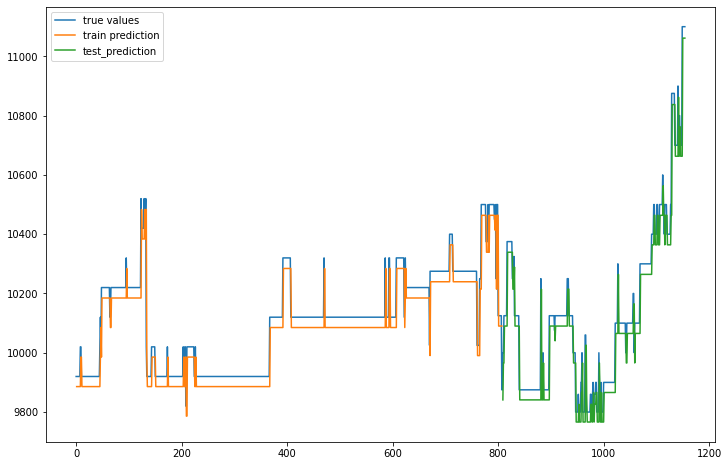

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model24.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model24.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9985.517 ],
       [ 9985.517 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9885.892 ],
       [ 9985.517 ],
       [10085.143 ],
       [ 9985

In [ ]:
test_prediction

array([[ 9841.06 ],
       [ 9965.592],
       [ 9965.592],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [10339.188],
       [10339.188],
       [10339.188],
       [10339.188],
       [10339.188],
       [10339.188],
       [10339.188],
       [10339.188],
       [10339.188],
       [10339.188],
       [10214.656],
       [10214.656],
       [10214.656],
       [10289.375],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [10090.123],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],
       [ 9841.06 ],


In [ ]:
model25 = Sequential()
model25.add(Dense(64, input_dim=look_back, activation='relu'))
model25.add(Dense(8, activation='relu'))
model25.add(Dense(1))
model25.compile(loss='mean_squared_error', optimizer='adam')
model25.fit(X_train, y_train, epochs=500, batch_size=2, verbose=2)

Epoch 1/500
404/404 - 1s - loss: 12214137.0000 - 1s/epoch - 3ms/step
Epoch 2/500
404/404 - 1s - loss: 2356.0330 - 515ms/epoch - 1ms/step
Epoch 3/500
404/404 - 1s - loss: 2377.6628 - 522ms/epoch - 1ms/step
Epoch 4/500
404/404 - 1s - loss: 2446.7642 - 531ms/epoch - 1ms/step
Epoch 5/500
404/404 - 1s - loss: 2443.9324 - 522ms/epoch - 1ms/step
Epoch 6/500
404/404 - 1s - loss: 2472.3970 - 518ms/epoch - 1ms/step
Epoch 7/500
404/404 - 1s - loss: 2555.5493 - 525ms/epoch - 1ms/step
Epoch 8/500
404/404 - 1s - loss: 2804.5527 - 826ms/epoch - 2ms/step
Epoch 9/500
404/404 - 1s - loss: 2834.6750 - 882ms/epoch - 2ms/step
Epoch 10/500
404/404 - 1s - loss: 2777.6689 - 759ms/epoch - 2ms/step
Epoch 11/500
404/404 - 1s - loss: 2808.1760 - 786ms/epoch - 2ms/step
Epoch 12/500
404/404 - 1s - loss: 2997.8901 - 752ms/epoch - 2ms/step
Epoch 13/500
404/404 - 1s - loss: 3005.3306 - 502ms/epoch - 1ms/step
Epoch 14/500
404/404 - 1s - loss: 3094.4497 - 509ms/epoch - 1ms/step
Epoch 15/500
404/404 - 1s - loss: 3641.662

In [ ]:
trainScore = model25.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model25.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 2ms/step - loss: 4456.4800
Train Score: 4456.48 MSE (66.76 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 7625.9536
Test Score: 7625.95 MSE (87.33 RMSE)


11/11 [==============================] - 0s 2ms/step


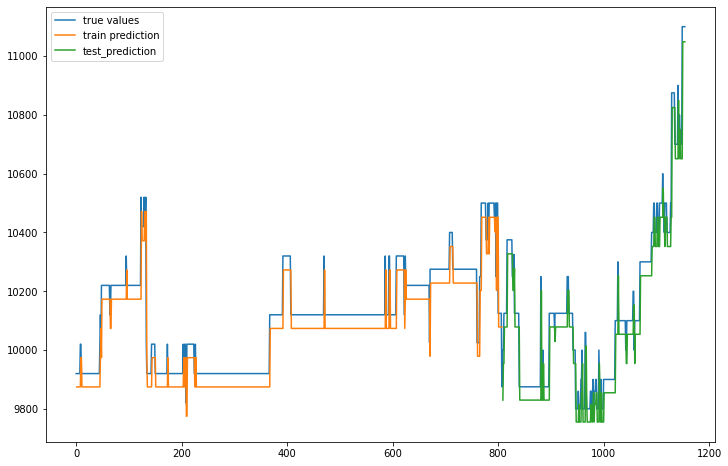

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model25.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model25.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9974.077],
       [ 9974.077],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.569],
       [ 9874.569],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9874.567],
       [ 9974.077],
       [10073.584],
       [ 9974.077],
       [10173.093],
       [10173.093],


In [ ]:
test_prediction

array([[ 9829.79 ],
       [ 9954.175],
       [ 9954.175],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [10327.331],
       [10327.331],
       [10327.331],
       [10327.331],
       [10327.331],
       [10327.331],
       [10327.331],
       [10327.331],
       [10327.331],
       [10327.331],
       [10202.945],
       [10202.945],
       [10202.945],
       [10277.577],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [10078.561],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],
       [ 9829.79 ],


In [ ]:
model26 = Sequential()
model26.add(Dense(64, input_dim=look_back, activation='relu'))
model26.add(Dense(8, activation='relu'))
model26.add(Dense(1))
model26.compile(loss='mean_squared_error', optimizer='adam')
model26.fit(X_train, y_train, epochs=600, batch_size=2, verbose=2)

Epoch 1/600
404/404 - 2s - loss: 15972508.0000 - 2s/epoch - 4ms/step
Epoch 2/600
404/404 - 1s - loss: 2363.5752 - 532ms/epoch - 1ms/step
Epoch 3/600
404/404 - 1s - loss: 2403.6812 - 532ms/epoch - 1ms/step
Epoch 4/600
404/404 - 1s - loss: 2424.0393 - 502ms/epoch - 1ms/step
Epoch 5/600
404/404 - 1s - loss: 2484.1375 - 555ms/epoch - 1ms/step
Epoch 6/600
404/404 - 1s - loss: 2458.4338 - 605ms/epoch - 1ms/step
Epoch 7/600
404/404 - 1s - loss: 2478.7910 - 545ms/epoch - 1ms/step
Epoch 8/600
404/404 - 1s - loss: 2580.7141 - 520ms/epoch - 1ms/step
Epoch 9/600
404/404 - 1s - loss: 2516.9565 - 512ms/epoch - 1ms/step
Epoch 10/600
404/404 - 1s - loss: 2591.1333 - 518ms/epoch - 1ms/step
Epoch 11/600
404/404 - 1s - loss: 2805.7205 - 533ms/epoch - 1ms/step
Epoch 12/600
404/404 - 1s - loss: 2714.9666 - 523ms/epoch - 1ms/step
Epoch 13/600
404/404 - 1s - loss: 2755.6672 - 537ms/epoch - 1ms/step
Epoch 14/600
404/404 - 1s - loss: 3059.7180 - 524ms/epoch - 1ms/step
Epoch 15/600
404/404 - 1s - loss: 3131.456

In [ ]:
trainScore = model26.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model26.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 3382.5920
Train Score: 3382.59 MSE (58.16 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5981.6436
Test Score: 5981.64 MSE (77.34 RMSE)


11/11 [==============================] - 0s 1ms/step


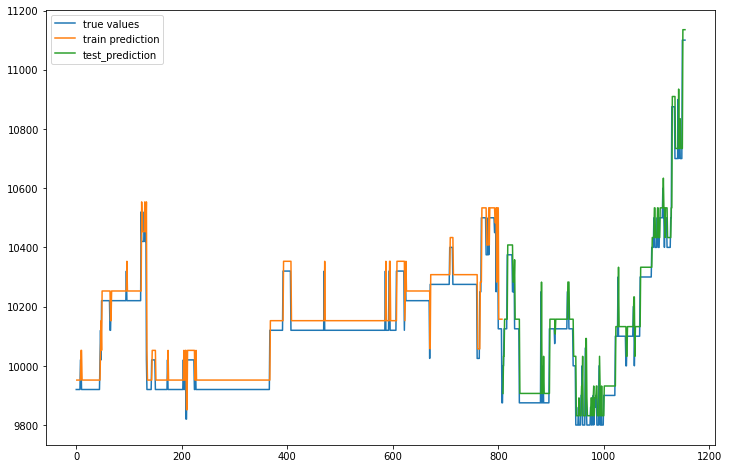

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model26.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model26.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [10052.155],
       [10052.155],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.868],
       [ 9951.868],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [ 9951.869],
       [10052.155],
       [10152.441],
       [10052.155],
       [10252.729],
       [10252.729],


In [ ]:
test_prediction

array([[ 9906.74  ],
       [10032.099 ],
       [10032.099 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10408.172 ],
       [10408.172 ],
       [10408.172 ],
       [10408.172 ],
       [10408.172 ],
       [10408.172 ],
       [10408.172 ],
       [10408.172 ],
       [10408.172 ],
       [10408.172 ],
       [10282.813 ],
       [10282.813 ],
       [10282.813 ],
       [10358.028 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [10157.456 ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906.74  ],
       [ 9906

In [ ]:
model27 = Sequential()
model27.add(Dense(64, input_dim=look_back, activation='relu'))
model27.add(Dense(8, activation='relu'))
model27.add(Dense(1))
model27.compile(loss='mean_squared_error', optimizer='adam')
model27.fit(X_train, y_train, epochs=700, batch_size=2, verbose=2)

Epoch 1/700
404/404 - 1s - loss: 4326043.0000 - 1s/epoch - 3ms/step
Epoch 2/700
404/404 - 1s - loss: 2463.4287 - 644ms/epoch - 2ms/step
Epoch 3/700
404/404 - 1s - loss: 2553.2510 - 879ms/epoch - 2ms/step
Epoch 4/700
404/404 - 1s - loss: 2575.4468 - 751ms/epoch - 2ms/step
Epoch 5/700
404/404 - 1s - loss: 2615.0527 - 767ms/epoch - 2ms/step
Epoch 6/700
404/404 - 1s - loss: 2635.7366 - 783ms/epoch - 2ms/step
Epoch 7/700
404/404 - 1s - loss: 2652.4570 - 706ms/epoch - 2ms/step
Epoch 8/700
404/404 - 1s - loss: 2822.2256 - 501ms/epoch - 1ms/step
Epoch 9/700
404/404 - 1s - loss: 3128.2556 - 522ms/epoch - 1ms/step
Epoch 10/700
404/404 - 1s - loss: 3111.4421 - 507ms/epoch - 1ms/step
Epoch 11/700
404/404 - 1s - loss: 3324.6567 - 523ms/epoch - 1ms/step
Epoch 12/700
404/404 - 1s - loss: 3374.9058 - 524ms/epoch - 1ms/step
Epoch 13/700
404/404 - 1s - loss: 5077.5039 - 510ms/epoch - 1ms/step
Epoch 14/700
404/404 - 1s - loss: 4085.9858 - 549ms/epoch - 1ms/step
Epoch 15/700
404/404 - 1s - loss: 3886.3787

In [ ]:
trainScore = model27.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model27.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 2488.1682
Train Score: 2488.17 MSE (49.88 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5411.4004
Test Score: 5411.40 MSE (73.56 RMSE)


11/11 [==============================] - 0s 2ms/step


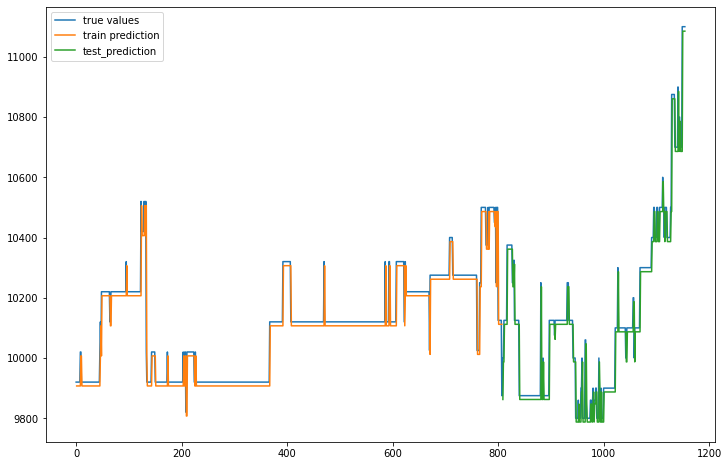

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model27.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model27.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [10007.026],
       [10007.026],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.2  ],
       [ 9907.2  ],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [ 9907.199],
       [10007.026],
       [10106.852],
       [10007.026],
       [10206.678],
       [10206.678],


In [ ]:
test_prediction

array([[ 9862.278],
       [ 9987.062],
       [ 9987.062],
       [10111.844],
       [10111.844],
       [10111.844],
       [10111.844],
       [10111.844],
       [10111.844],
       [10361.41 ],
       [10361.41 ],
       [10361.41 ],
       [10361.41 ],
       [10361.41 ],
       [10361.41 ],
       [10361.41 ],
       [10361.41 ],
       [10361.41 ],
       [10361.41 ],
       [10236.626],
       [10236.626],
       [10236.626],
       [10311.495],
       [10111.844],
       [10111.844],
       [10111.844],
       [10111.844],
       [10111.844],
       [10111.844],
       [10111.844],
       [10111.845],
       [10111.845],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],
       [ 9862.278],


In [ ]:
model28 = Sequential()
model28.add(Dense(64, input_dim=look_back, activation='relu'))
model28.add(Dense(8, activation='relu'))
model28.add(Dense(1))
model28.compile(loss='mean_squared_error', optimizer='adam')
model28.fit(X_train, y_train, epochs=800, batch_size=2, verbose=2)

Epoch 1/800
404/404 - 1s - loss: 21646112.0000 - 1s/epoch - 3ms/step
Epoch 2/800
404/404 - 1s - loss: 2360.0605 - 688ms/epoch - 2ms/step
Epoch 3/800
404/404 - 1s - loss: 2455.4258 - 765ms/epoch - 2ms/step
Epoch 4/800
404/404 - 1s - loss: 2457.9556 - 782ms/epoch - 2ms/step
Epoch 5/800
404/404 - 1s - loss: 2460.2043 - 766ms/epoch - 2ms/step
Epoch 6/800
404/404 - 1s - loss: 2516.5198 - 766ms/epoch - 2ms/step
Epoch 7/800
404/404 - 1s - loss: 2470.0261 - 679ms/epoch - 2ms/step
Epoch 8/800
404/404 - 0s - loss: 2533.9438 - 491ms/epoch - 1ms/step
Epoch 9/800
404/404 - 1s - loss: 2644.6897 - 540ms/epoch - 1ms/step
Epoch 10/800
404/404 - 1s - loss: 2793.1177 - 507ms/epoch - 1ms/step
Epoch 11/800
404/404 - 1s - loss: 2678.6438 - 552ms/epoch - 1ms/step
Epoch 12/800
404/404 - 1s - loss: 2898.3367 - 567ms/epoch - 1ms/step
Epoch 13/800
404/404 - 1s - loss: 2983.1675 - 518ms/epoch - 1ms/step
Epoch 14/800
404/404 - 1s - loss: 2941.0366 - 529ms/epoch - 1ms/step
Epoch 15/800
404/404 - 1s - loss: 3076.241

In [ ]:
trainScore = model28.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model28.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 2824.4412
Train Score: 2824.44 MSE (53.15 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5817.2476
Test Score: 5817.25 MSE (76.27 RMSE)


11/11 [==============================] - 0s 1ms/step


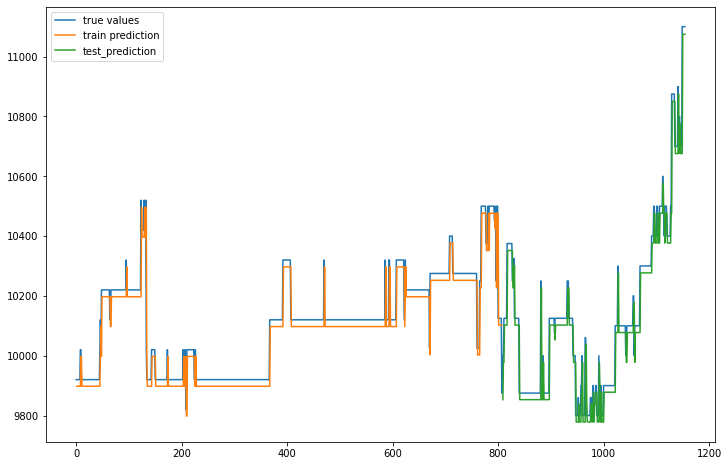

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model28.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model28.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9997.625 ],
       [ 9997.625 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9897.895 ],
       [ 9997.625 ],
       [10097.354 ],
       [ 9997

In [ ]:
test_prediction

array([[ 9853.016],
       [ 9977.679],
       [ 9977.679],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [10351.666],
       [10351.666],
       [10351.666],
       [10351.666],
       [10351.666],
       [10351.666],
       [10351.666],
       [10351.666],
       [10351.666],
       [10351.666],
       [10227.004],
       [10227.004],
       [10227.004],
       [10301.801],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [10102.341],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],
       [ 9853.016],


In [ ]:
model29 = Sequential()
model29.add(Dense(64, input_dim=look_back, activation='relu'))
model29.add(Dense(8, activation='relu'))
model29.add(Dense(1))
model29.compile(loss='mean_squared_error', optimizer='adam')
model29.fit(X_train, y_train, epochs=900, batch_size=2, verbose=2)

Epoch 1/900
404/404 - 3s - loss: 8548544.0000 - 3s/epoch - 8ms/step
Epoch 2/900
404/404 - 1s - loss: 2401.6521 - 650ms/epoch - 2ms/step
Epoch 3/900
404/404 - 1s - loss: 2412.7756 - 538ms/epoch - 1ms/step
Epoch 4/900
404/404 - 1s - loss: 2446.9058 - 519ms/epoch - 1ms/step
Epoch 5/900
404/404 - 1s - loss: 2505.0208 - 549ms/epoch - 1ms/step
Epoch 6/900
404/404 - 1s - loss: 2563.6045 - 618ms/epoch - 2ms/step
Epoch 7/900
404/404 - 1s - loss: 2506.8706 - 597ms/epoch - 1ms/step
Epoch 8/900
404/404 - 1s - loss: 2720.3960 - 589ms/epoch - 1ms/step
Epoch 9/900
404/404 - 1s - loss: 2840.6208 - 571ms/epoch - 1ms/step
Epoch 10/900
404/404 - 1s - loss: 2824.6523 - 554ms/epoch - 1ms/step
Epoch 11/900
404/404 - 1s - loss: 2909.3098 - 623ms/epoch - 2ms/step
Epoch 12/900
404/404 - 1s - loss: 3231.6692 - 683ms/epoch - 2ms/step
Epoch 13/900
404/404 - 1s - loss: 3377.3328 - 539ms/epoch - 1ms/step
Epoch 14/900
404/404 - 1s - loss: 3417.3037 - 566ms/epoch - 1ms/step
Epoch 15/900
404/404 - 1s - loss: 3911.7896

In [ ]:
trainScore = model29.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model29.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 2ms/step - loss: 2370.0854
Train Score: 2370.09 MSE (48.68 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5250.6836
Test Score: 5250.68 MSE (72.46 RMSE)


11/11 [==============================] - 0s 2ms/step


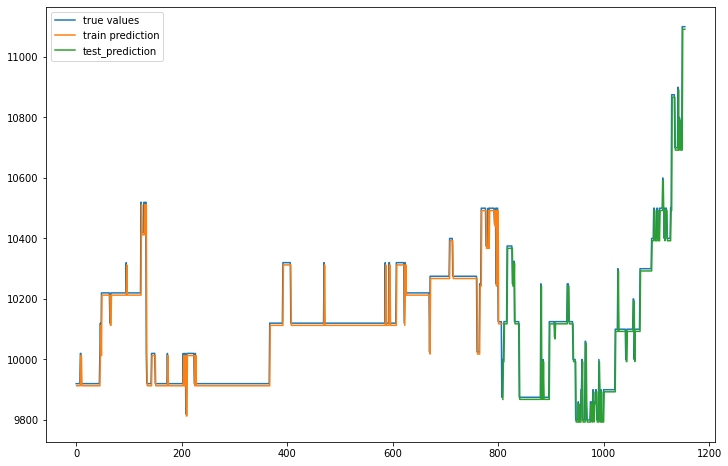

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model29.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model29.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [10026.032 ],
       [10026.032 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [ 9926.035 ],
       [10026.032 ],
       [10126.028 ],
       [10026

In [ ]:
test_prediction

array([[ 9881.035 ],
       [10006.031 ],
       [10006.031 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10381.0205],
       [10381.0205],
       [10381.0205],
       [10381.0205],
       [10381.0205],
       [10381.0205],
       [10381.0205],
       [10381.0205],
       [10381.0205],
       [10381.0205],
       [10256.023 ],
       [10256.023 ],
       [10256.023 ],
       [10331.022 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [10131.028 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881.035 ],
       [ 9881

In [ ]:
model210 = Sequential()
model210.add(Dense(64, input_dim=look_back, activation='relu'))
model210.add(Dense(8, activation='relu'))
model210.add(Dense(1))
model210.compile(loss='mean_squared_error', optimizer='adam')
model210.fit(X_train, y_train, epochs=1000, batch_size=2, verbose=2)

Epoch 1/1000
404/404 - 1s - loss: 6060036.0000 - 1s/epoch - 3ms/step
Epoch 2/1000
404/404 - 1s - loss: 2396.3391 - 618ms/epoch - 2ms/step
Epoch 3/1000
404/404 - 1s - loss: 2412.2610 - 960ms/epoch - 2ms/step
Epoch 4/1000
404/404 - 1s - loss: 2470.8682 - 757ms/epoch - 2ms/step
Epoch 5/1000
404/404 - 1s - loss: 2514.3455 - 775ms/epoch - 2ms/step
Epoch 6/1000
404/404 - 1s - loss: 2525.5215 - 722ms/epoch - 2ms/step
Epoch 7/1000
404/404 - 1s - loss: 2720.6357 - 547ms/epoch - 1ms/step
Epoch 8/1000
404/404 - 1s - loss: 2875.5183 - 518ms/epoch - 1ms/step
Epoch 9/1000
404/404 - 1s - loss: 2890.0811 - 518ms/epoch - 1ms/step
Epoch 10/1000
404/404 - 1s - loss: 2779.9397 - 551ms/epoch - 1ms/step
Epoch 11/1000
404/404 - 1s - loss: 3260.6604 - 521ms/epoch - 1ms/step
Epoch 12/1000
404/404 - 1s - loss: 3283.6245 - 526ms/epoch - 1ms/step
Epoch 13/1000
404/404 - 1s - loss: 3664.1519 - 521ms/epoch - 1ms/step
Epoch 14/1000
404/404 - 1s - loss: 3445.9182 - 522ms/epoch - 1ms/step
Epoch 15/1000
404/404 - 1s - 

In [ ]:
trainScore = model210.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model210.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 4366.0361
Train Score: 4366.04 MSE (66.08 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 7528.7021
Test Score: 7528.70 MSE (86.77 RMSE)


11/11 [==============================] - 0s 1ms/step


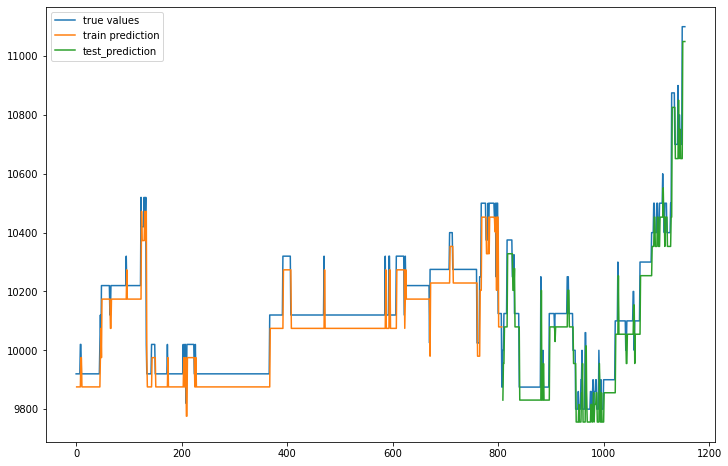

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model210.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model210.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9975.076],
       [ 9975.076],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9875.588],
       [ 9975.076],
       [10074.565],
       [ 9975.076],
       [10174.054],
       [10174.054],


In [ ]:
test_prediction

array([[ 9830.818 ],
       [ 9955.179 ],
       [ 9955.179 ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10328.261 ],
       [10328.261 ],
       [10328.261 ],
       [10328.261 ],
       [10328.261 ],
       [10328.261 ],
       [10328.261 ],
       [10328.261 ],
       [10328.261 ],
       [10328.261 ],
       [10203.901 ],
       [10203.901 ],
       [10203.901 ],
       [10278.517 ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [10079.54  ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830.818 ],
       [ 9830

# **SKEMA** PENGUJIAN DENGAN JUMLAH NEURON INPUT LAYER

In [ ]:
model31 = Sequential()
model31.add(Dense(128, input_dim=look_back, activation='relu'))
model31.add(Dense(8, activation='relu'))
model31.add(Dense(1))
model31.compile(loss='mean_squared_error', optimizer='adam')
model31.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 2s - loss: 8467411.0000 - 2s/epoch - 4ms/step
Epoch 2/100
404/404 - 1s - loss: 2393.5320 - 816ms/epoch - 2ms/step
Epoch 3/100
404/404 - 1s - loss: 2432.6409 - 723ms/epoch - 2ms/step
Epoch 4/100
404/404 - 1s - loss: 2510.4519 - 822ms/epoch - 2ms/step
Epoch 5/100
404/404 - 1s - loss: 2639.2427 - 806ms/epoch - 2ms/step
Epoch 6/100
404/404 - 1s - loss: 2559.8044 - 555ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 2827.5139 - 586ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 2645.0198 - 806ms/epoch - 2ms/step
Epoch 9/100
404/404 - 1s - loss: 2849.9866 - 583ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 2799.1980 - 536ms/epoch - 1ms/step
Epoch 11/100
404/404 - 1s - loss: 3359.7917 - 603ms/epoch - 1ms/step
Epoch 12/100
404/404 - 1s - loss: 2815.6799 - 701ms/epoch - 2ms/step
Epoch 13/100
404/404 - 1s - loss: 3364.1909 - 799ms/epoch - 2ms/step
Epoch 14/100
404/404 - 1s - loss: 3645.3052 - 1s/epoch - 3ms/step
Epoch 15/100
404/404 - 1s - loss: 3588.0515 - 

In [ ]:
trainScore = model31.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model31.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 2ms/step - loss: 3224.2769
Train Score: 3224.28 MSE (56.78 RMSE)
11/11 [==============================] - 0s 3ms/step - loss: 6272.7949
Test Score: 6272.79 MSE (79.20 RMSE)


11/11 [==============================] - 0s 2ms/step


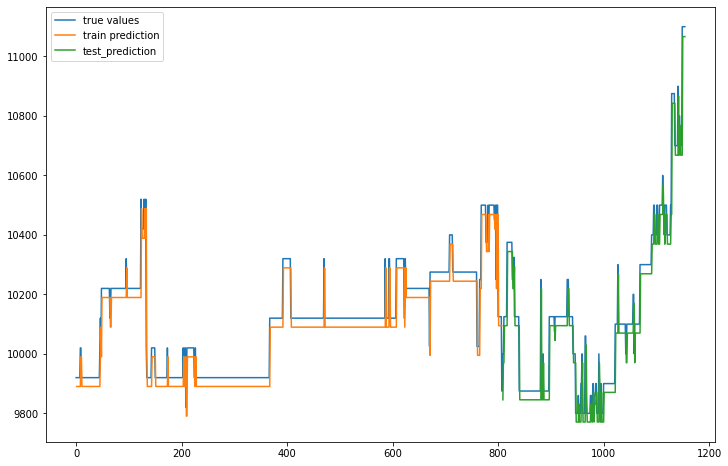

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model31.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model31.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9990.065],
       [ 9990.065],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9890.375],
       [ 9990.065],
       [10089.754],
       [ 9990.065],
       [10189.443],
       [10189.443],


In [ ]:
test_prediction

array([[ 9845.517 ],
       [ 9970.126 ],
       [ 9970.126 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10343.962 ],
       [10343.962 ],
       [10343.962 ],
       [10343.962 ],
       [10343.962 ],
       [10343.962 ],
       [10343.962 ],
       [10343.962 ],
       [10343.962 ],
       [10343.962 ],
       [10219.351 ],
       [10219.351 ],
       [10219.351 ],
       [10294.116 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [10094.738 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845.517 ],
       [ 9845

In [ ]:
model32 = Sequential()
model32.add(Dense(256, input_dim=look_back, activation='relu'))
model32.add(Dense(8, activation='relu'))
model32.add(Dense(1))
model32.compile(loss='mean_squared_error', optimizer='adam')
model32.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 8582047.0000 - 1s/epoch - 4ms/step
Epoch 2/100
404/404 - 1s - loss: 2492.0354 - 693ms/epoch - 2ms/step
Epoch 3/100
404/404 - 1s - loss: 2521.3706 - 671ms/epoch - 2ms/step
Epoch 4/100
404/404 - 1s - loss: 2548.2031 - 522ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 2731.1235 - 536ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 2816.3027 - 521ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 2985.0208 - 562ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 2847.4692 - 519ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 3225.8169 - 529ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 3075.4150 - 542ms/epoch - 1ms/step
Epoch 11/100
404/404 - 1s - loss: 3404.3538 - 553ms/epoch - 1ms/step
Epoch 12/100
404/404 - 1s - loss: 3409.5579 - 531ms/epoch - 1ms/step
Epoch 13/100
404/404 - 1s - loss: 3803.3271 - 529ms/epoch - 1ms/step
Epoch 14/100
404/404 - 1s - loss: 4392.0273 - 553ms/epoch - 1ms/step
Epoch 15/100
404/404 - 1s - loss: 4439.0684

In [ ]:
trainScore = model32.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model32.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 2819.7112
Train Score: 2819.71 MSE (53.10 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5811.4033
Test Score: 5811.40 MSE (76.23 RMSE)


11/11 [==============================] - 0s 2ms/step


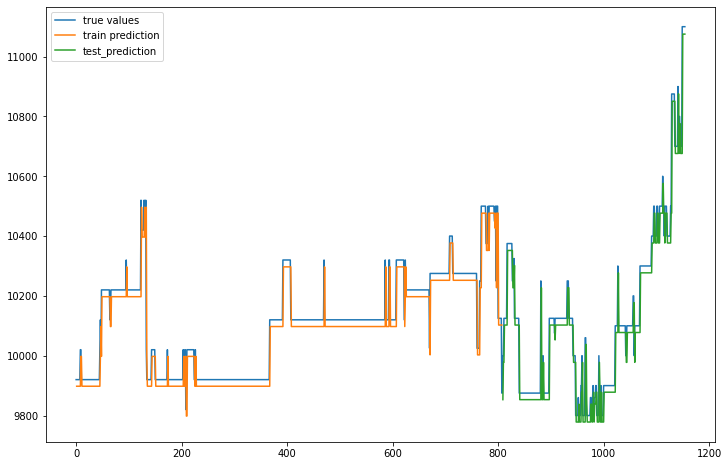

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model32.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model32.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9997.714],
       [ 9997.714],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.948],
       [ 9897.948],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9897.949],
       [ 9997.714],
       [10097.479],
       [ 9997.714],
       [10197.243],
       [10197.243],


In [ ]:
test_prediction

array([[ 9853.054],
       [ 9977.761],
       [ 9977.761],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [10351.878],
       [10351.878],
       [10351.878],
       [10351.878],
       [10351.878],
       [10351.878],
       [10351.878],
       [10351.878],
       [10351.878],
       [10351.878],
       [10227.173],
       [10227.173],
       [10227.173],
       [10301.995],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [10102.466],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],
       [ 9853.054],


# **SKEMA** PENGUJIAN DENGAN JUMLAH NEURON HIDDEN LAYER

In [ ]:
model41 = Sequential()
model41.add(Dense(64, input_dim=look_back, activation='relu'))
model41.add(Dense(10, activation='relu'))
model41.add(Dense(1))
model41.compile(loss='mean_squared_error', optimizer='adam')
model41.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 3802364.2500 - 1s/epoch - 4ms/step
Epoch 2/100
404/404 - 1s - loss: 2460.1284 - 565ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 2525.2141 - 533ms/epoch - 1ms/step
Epoch 4/100
404/404 - 1s - loss: 2547.2925 - 538ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 2915.7949 - 518ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 2836.8228 - 545ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 2802.4172 - 534ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 2848.0989 - 527ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 3049.9893 - 535ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 3437.8052 - 584ms/epoch - 1ms/step
Epoch 11/100
404/404 - 1s - loss: 3390.4819 - 525ms/epoch - 1ms/step
Epoch 12/100
404/404 - 1s - loss: 3580.7397 - 540ms/epoch - 1ms/step
Epoch 13/100
404/404 - 1s - loss: 3856.7371 - 527ms/epoch - 1ms/step
Epoch 14/100
404/404 - 1s - loss: 4514.4824 - 568ms/epoch - 1ms/step
Epoch 15/100
404/404 - 1s - loss: 4084.1333

In [ ]:
trainScore = model41.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model41.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 3038.9998
Train Score: 3039.00 MSE (55.13 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5678.7485
Test Score: 5678.75 MSE (75.36 RMSE)


11/11 [==============================] - 0s 1ms/step


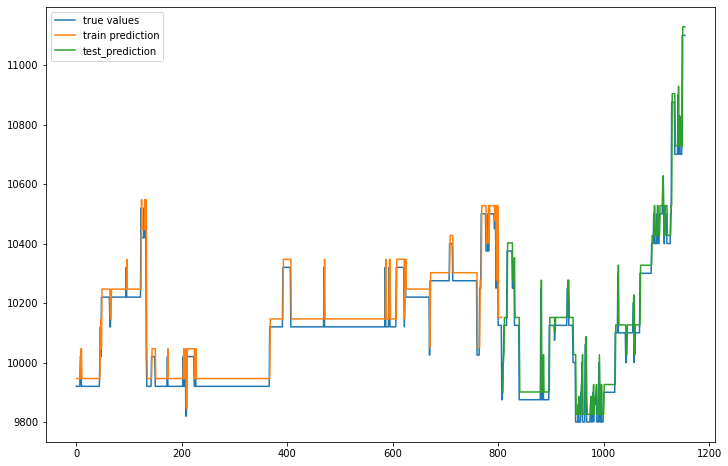

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model41.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model41.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [10046.393 ],
       [10046.393 ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [ 9946.14  ],
       [10046.393 ],
       [10146.6455],
       [10046

In [ ]:
test_prediction

array([[ 9901.026 ],
       [10026.343 ],
       [10026.343 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10402.29  ],
       [10402.29  ],
       [10402.29  ],
       [10402.29  ],
       [10402.29  ],
       [10402.29  ],
       [10402.29  ],
       [10402.29  ],
       [10402.29  ],
       [10402.29  ],
       [10276.975 ],
       [10276.975 ],
       [10276.975 ],
       [10352.165 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10151.658 ],
       [10151.659 ],
       [10151.659 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901.026 ],
       [ 9901

In [ ]:
model42 = Sequential()
model42.add(Dense(64, input_dim=look_back, activation='relu'))
model42.add(Dense(20, activation='relu'))
model42.add(Dense(1))
model42.compile(loss='mean_squared_error', optimizer='adam')
model42.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 3s - loss: 3617588.7500 - 3s/epoch - 6ms/step
Epoch 2/100
404/404 - 1s - loss: 2517.5330 - 794ms/epoch - 2ms/step
Epoch 3/100
404/404 - 1s - loss: 2570.0684 - 785ms/epoch - 2ms/step
Epoch 4/100
404/404 - 1s - loss: 2607.3523 - 823ms/epoch - 2ms/step
Epoch 5/100
404/404 - 1s - loss: 2576.4285 - 623ms/epoch - 2ms/step
Epoch 6/100
404/404 - 1s - loss: 2556.2390 - 572ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 2759.7236 - 532ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 2928.0476 - 541ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 2971.5376 - 541ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 3222.4771 - 555ms/epoch - 1ms/step
Epoch 11/100
404/404 - 1s - loss: 3694.7146 - 577ms/epoch - 1ms/step
Epoch 12/100
404/404 - 1s - loss: 3807.3540 - 546ms/epoch - 1ms/step
Epoch 13/100
404/404 - 1s - loss: 3758.2051 - 566ms/epoch - 1ms/step
Epoch 14/100
404/404 - 1s - loss: 3572.1858 - 539ms/epoch - 1ms/step
Epoch 15/100
404/404 - 1s - loss: 4385.9248

In [ ]:
trainScore = model42.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model42.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 5ms/step - loss: 2322.6763
Train Score: 2322.68 MSE (48.19 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5162.1348
Test Score: 5162.13 MSE (71.85 RMSE)


11/11 [==============================] - 0s 2ms/step


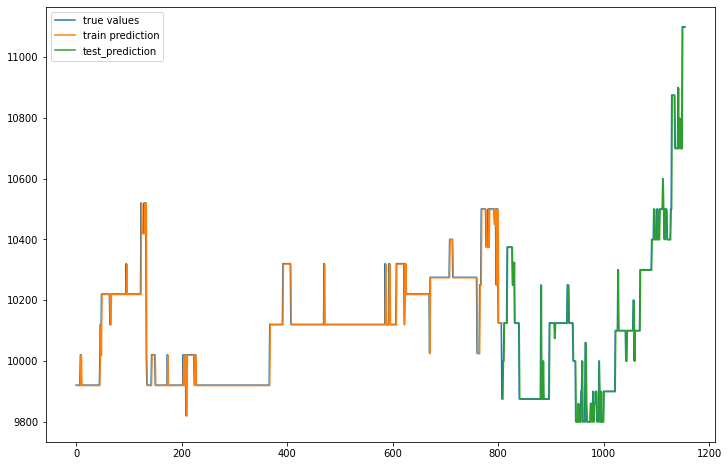

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model42.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model42.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [10018.458],
       [10018.458],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [ 9918.483],
       [10018.458],
       [10118.433],
       [10018.458],
       [10218.407],
       [10218.407],


In [ ]:
test_prediction

array([[ 9873.494 ],
       [ 9998.462 ],
       [ 9998.462 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10373.37  ],
       [10373.37  ],
       [10373.37  ],
       [10373.37  ],
       [10373.37  ],
       [10373.37  ],
       [10373.37  ],
       [10373.37  ],
       [10373.37  ],
       [10373.37  ],
       [10248.401 ],
       [10248.401 ],
       [10248.401 ],
       [10323.382 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10123.432 ],
       [10123.431 ],
       [10123.431 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873.494 ],
       [ 9873

In [ ]:
model43 = Sequential()
model43.add(Dense(64, input_dim=look_back, activation='relu'))
model43.add(Dense(30, activation='relu'))
model43.add(Dense(1))
model43.compile(loss='mean_squared_error', optimizer='adam')
model43.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 5684204.5000 - 1s/epoch - 3ms/step
Epoch 2/100
404/404 - 1s - loss: 2458.6726 - 516ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 2542.5562 - 514ms/epoch - 1ms/step
Epoch 4/100
404/404 - 1s - loss: 2597.5544 - 525ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 2746.4329 - 564ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 2822.2524 - 528ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 2798.3835 - 556ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 3108.4668 - 604ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 2921.9058 - 590ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 3178.3999 - 536ms/epoch - 1ms/step
Epoch 11/100
404/404 - 1s - loss: 3532.7715 - 677ms/epoch - 2ms/step
Epoch 12/100
404/404 - 1s - loss: 3439.0366 - 794ms/epoch - 2ms/step
Epoch 13/100
404/404 - 1s - loss: 4460.2144 - 786ms/epoch - 2ms/step
Epoch 14/100
404/404 - 1s - loss: 3861.8569 - 785ms/epoch - 2ms/step
Epoch 15/100
404/404 - 1s - loss: 4340.9282

In [ ]:
trainScore = model43.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model43.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 2598.0442
Train Score: 2598.04 MSE (50.97 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5308.9785
Test Score: 5308.98 MSE (72.86 RMSE)


11/11 [==============================] - 0s 1ms/step


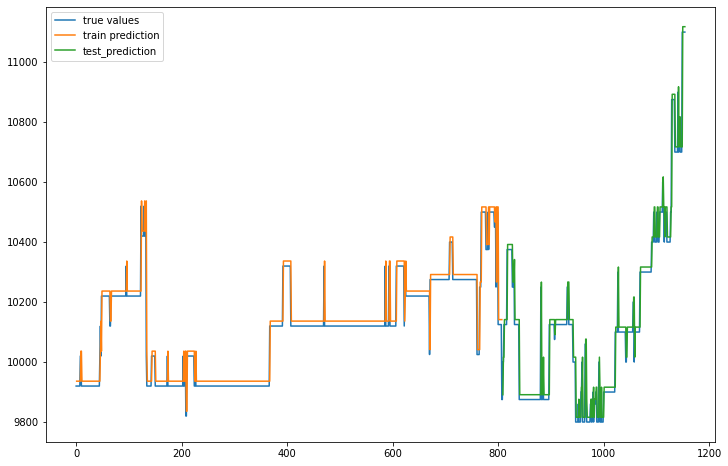

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model43.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model43.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [10036.34 ],
       [10036.34 ],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [ 9936.189],
       [10036.34 ],
       [10136.493],
       [10036.34 ],
       [10236.645],
       [10236.645],


In [ ]:
test_prediction

array([[ 9891.12 ],
       [10016.311],
       [10016.311],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10391.881],
       [10391.881],
       [10391.881],
       [10391.881],
       [10391.881],
       [10391.881],
       [10391.881],
       [10391.881],
       [10391.881],
       [10391.881],
       [10266.69 ],
       [10266.69 ],
       [10266.69 ],
       [10341.806],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10141.5  ],
       [10141.501],
       [10141.501],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],
       [ 9891.12 ],


In [ ]:
model44 = Sequential()
model44.add(Dense(64, input_dim=look_back, activation='relu'))
model44.add(Dense(50, activation='relu'))
model44.add(Dense(1))
model44.compile(loss='mean_squared_error', optimizer='adam')
model44.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 5583213.5000 - 1s/epoch - 3ms/step
Epoch 2/100
404/404 - 1s - loss: 2436.9624 - 554ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 2617.5105 - 524ms/epoch - 1ms/step
Epoch 4/100
404/404 - 1s - loss: 2600.5659 - 528ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 2681.1477 - 547ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 3014.9380 - 635ms/epoch - 2ms/step
Epoch 7/100
404/404 - 1s - loss: 2888.9192 - 826ms/epoch - 2ms/step
Epoch 8/100
404/404 - 1s - loss: 3279.8179 - 771ms/epoch - 2ms/step
Epoch 9/100
404/404 - 1s - loss: 3620.0752 - 804ms/epoch - 2ms/step
Epoch 10/100
404/404 - 1s - loss: 3581.3459 - 821ms/epoch - 2ms/step
Epoch 11/100
404/404 - 1s - loss: 3614.7976 - 693ms/epoch - 2ms/step
Epoch 12/100
404/404 - 1s - loss: 3925.5713 - 549ms/epoch - 1ms/step
Epoch 13/100
404/404 - 1s - loss: 4547.8135 - 534ms/epoch - 1ms/step
Epoch 14/100
404/404 - 1s - loss: 4259.3188 - 550ms/epoch - 1ms/step
Epoch 15/100
404/404 - 1s - loss: 4797.5786

In [ ]:
trainScore = model44.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model44.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 2ms/step - loss: 5325.3296
Train Score: 5325.33 MSE (72.97 RMSE)
11/11 [==============================] - 0s 3ms/step - loss: 8559.4238
Test Score: 8559.42 MSE (92.52 RMSE)


11/11 [==============================] - 0s 3ms/step


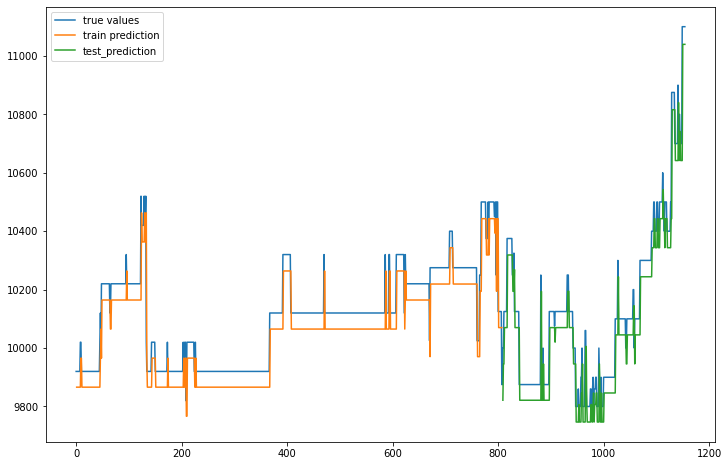

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model44.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model44.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9965.54 ],
       [ 9965.54 ],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.095],
       [ 9866.095],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9866.096],
       [ 9965.54 ],
       [10064.986],
       [ 9965.54 ],
       [10164.431],
       [10164.431],


In [ ]:
test_prediction

array([[ 9821.344],
       [ 9945.651],
       [ 9945.651],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [10318.572],
       [10318.572],
       [10318.572],
       [10318.572],
       [10318.572],
       [10318.572],
       [10318.572],
       [10318.572],
       [10318.572],
       [10318.572],
       [10194.265],
       [10194.265],
       [10194.265],
       [10268.849],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [10069.959],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],
       [ 9821.344],


In [ ]:
model45 = Sequential()
model45.add(Dense(64, input_dim=look_back, activation='relu'))
model45.add(Dense(64, activation='relu'))
model45.add(Dense(1))
model45.compile(loss='mean_squared_error', optimizer='adam')
model45.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 3444717.0000 - 1s/epoch - 4ms/step
Epoch 2/100
404/404 - 1s - loss: 2530.1763 - 605ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 2777.6333 - 582ms/epoch - 1ms/step
Epoch 4/100
404/404 - 1s - loss: 2739.2366 - 594ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 2827.2036 - 563ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 3113.7917 - 540ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 3292.1897 - 576ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 2992.4758 - 560ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 3710.6208 - 585ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 4045.9897 - 561ms/epoch - 1ms/step
Epoch 11/100
404/404 - 1s - loss: 4275.7046 - 536ms/epoch - 1ms/step
Epoch 12/100
404/404 - 1s - loss: 4333.5308 - 517ms/epoch - 1ms/step
Epoch 13/100
404/404 - 1s - loss: 4294.6455 - 541ms/epoch - 1ms/step
Epoch 14/100
404/404 - 1s - loss: 4697.2241 - 535ms/epoch - 1ms/step
Epoch 15/100
404/404 - 1s - loss: 4550.5688

In [ ]:
trainScore = model45.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model45.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 5225.1016
Train Score: 5225.10 MSE (72.28 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 7678.5176
Test Score: 7678.52 MSE (87.63 RMSE)


11/11 [==============================] - 0s 2ms/step


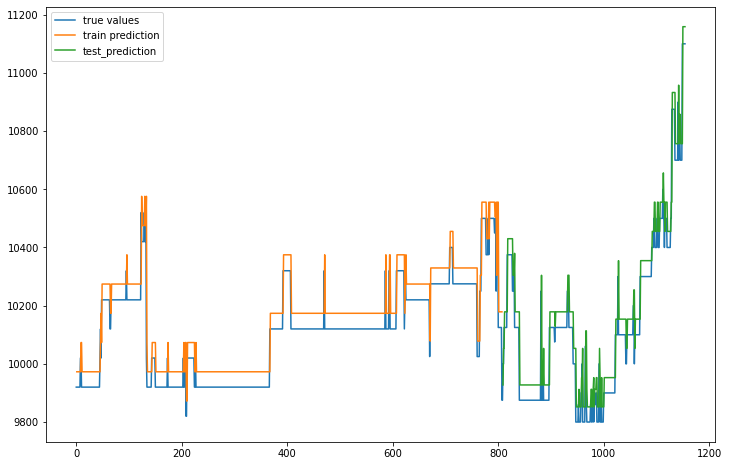

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model45.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model45.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [10073.232],
       [10073.232],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.713],
       [ 9972.713],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [ 9972.712],
       [10073.232],
       [10173.752],
       [10073.232],
       [10274.271],
       [10274.271],


In [ ]:
test_prediction

array([[ 9927.479 ],
       [10053.127 ],
       [10053.127 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10430.078 ],
       [10430.078 ],
       [10430.078 ],
       [10430.078 ],
       [10430.078 ],
       [10430.078 ],
       [10430.078 ],
       [10430.078 ],
       [10430.078 ],
       [10430.078 ],
       [10304.428 ],
       [10304.428 ],
       [10304.428 ],
       [10379.818 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10178.777 ],
       [10178.778 ],
       [10178.778 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927.479 ],
       [ 9927

In [ ]:
model46 = Sequential()
model46.add(Dense(64, input_dim=look_back, activation='relu'))
model46.add(Dense(128, activation='relu'))
model46.add(Dense(1))
model46.compile(loss='mean_squared_error', optimizer='adam')
model46.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 2165237.7500 - 1s/epoch - 3ms/step
Epoch 2/100
404/404 - 1s - loss: 2786.4194 - 569ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 2820.2988 - 559ms/epoch - 1ms/step
Epoch 4/100
404/404 - 1s - loss: 3211.1985 - 538ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 2961.5325 - 524ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 3414.9644 - 627ms/epoch - 2ms/step
Epoch 7/100
404/404 - 1s - loss: 4025.4216 - 611ms/epoch - 2ms/step
Epoch 8/100
404/404 - 1s - loss: 4785.3062 - 544ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 3896.8103 - 534ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 4883.5234 - 621ms/epoch - 2ms/step
Epoch 11/100
404/404 - 1s - loss: 5274.9775 - 562ms/epoch - 1ms/step
Epoch 12/100
404/404 - 1s - loss: 5345.7856 - 533ms/epoch - 1ms/step
Epoch 13/100
404/404 - 1s - loss: 5695.4146 - 777ms/epoch - 2ms/step
Epoch 14/100
404/404 - 1s - loss: 5972.4707 - 821ms/epoch - 2ms/step
Epoch 15/100
404/404 - 1s - loss: 8137.8257

In [ ]:
trainScore = model46.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model46.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 3084.5518
Train Score: 3084.55 MSE (55.54 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 5718.4409
Test Score: 5718.44 MSE (75.62 RMSE)


11/11 [==============================] - 0s 1ms/step


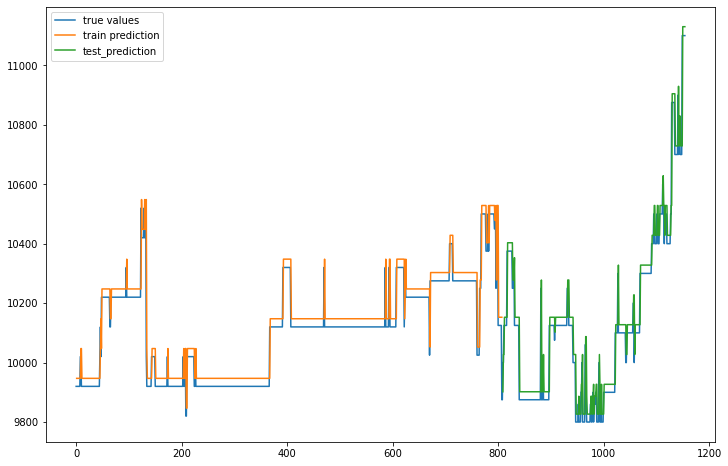

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model46.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model46.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [10047.222],
       [10047.222],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [ 9946.961],
       [10047.222],
       [10147.483],
       [10047.222],
       [10247.743],
       [10247.743],


In [ ]:
test_prediction

array([[ 9901.845],
       [10027.169],
       [10027.169],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [10403.148],
       [10403.148],
       [10403.148],
       [10403.148],
       [10403.148],
       [10403.148],
       [10403.148],
       [10403.148],
       [10403.148],
       [10403.148],
       [10277.822],
       [10277.822],
       [10277.822],
       [10353.017],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [10152.495],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],
       [ 9901.845],


In [ ]:
model47 = Sequential()
model47.add(Dense(64, input_dim=look_back, activation='relu'))
model47.add(Dense(256, activation='relu'))
model47.add(Dense(1))
model47.compile(loss='mean_squared_error', optimizer='adam')
model47.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 1977816.6250 - 1s/epoch - 3ms/step
Epoch 2/100
404/404 - 1s - loss: 2929.1333 - 560ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 3318.8264 - 532ms/epoch - 1ms/step
Epoch 4/100
404/404 - 1s - loss: 3136.2720 - 551ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 3408.3845 - 577ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 3909.0867 - 543ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 4782.5132 - 553ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 4415.0430 - 716ms/epoch - 2ms/step
Epoch 9/100
404/404 - 1s - loss: 4584.2407 - 843ms/epoch - 2ms/step
Epoch 10/100
404/404 - 1s - loss: 4383.3584 - 848ms/epoch - 2ms/step
Epoch 11/100
404/404 - 1s - loss: 5540.7896 - 844ms/epoch - 2ms/step
Epoch 12/100
404/404 - 1s - loss: 5477.1665 - 853ms/epoch - 2ms/step
Epoch 13/100
404/404 - 1s - loss: 6010.6201 - 642ms/epoch - 2ms/step
Epoch 14/100
404/404 - 1s - loss: 6638.3892 - 539ms/epoch - 1ms/step
Epoch 15/100
404/404 - 1s - loss: 7208.7393

In [ ]:
trainScore = model47.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model47.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 1ms/step - loss: 6812.0000
Train Score: 6812.00 MSE (82.53 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 9177.2031
Test Score: 9177.20 MSE (95.80 RMSE)


11/11 [==============================] - 0s 1ms/step


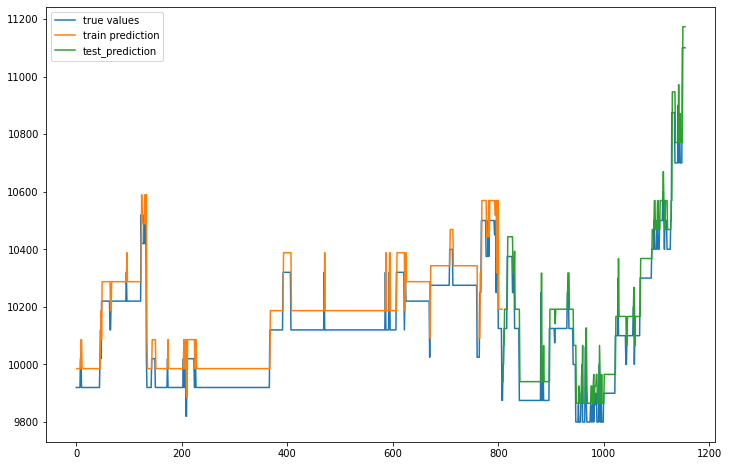

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model47.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model47.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [10086.232],
       [10086.232],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [ 9985.581],
       [10086.232],
       [10186.883],
       [10086.232],
       [10287.535],
       [10287.535],


In [ ]:
test_prediction

array([[ 9940.287 ],
       [10066.102 ],
       [10066.102 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10443.545 ],
       [10443.545 ],
       [10443.545 ],
       [10443.545 ],
       [10443.545 ],
       [10443.545 ],
       [10443.545 ],
       [10443.545 ],
       [10443.545 ],
       [10443.545 ],
       [10317.73  ],
       [10317.73  ],
       [10317.73  ],
       [10393.219 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [10191.916 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940.287 ],
       [ 9940

# **SKEMA** PENGUJIAN DENGAN JUMLAH  HIDDEN LAYER

In [ ]:
model51 = Sequential()
model51.add(Dense(64, input_dim=look_back, activation='relu'))
model51.add(Dense(20, activation='relu'))
model51.add(Dense(20, activation='relu'))
model51.add(Dense(1))
model51.compile(loss='mean_squared_error', optimizer='adam')
model51.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 2s - loss: 7638324.5000 - 2s/epoch - 5ms/step
Epoch 2/100
404/404 - 1s - loss: 2447.6116 - 579ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 2579.9324 - 574ms/epoch - 1ms/step
Epoch 4/100
404/404 - 1s - loss: 2661.5361 - 531ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 2812.8655 - 550ms/epoch - 1ms/step
Epoch 6/100
404/404 - 1s - loss: 2902.6160 - 568ms/epoch - 1ms/step
Epoch 7/100
404/404 - 1s - loss: 3000.4380 - 570ms/epoch - 1ms/step
Epoch 8/100
404/404 - 1s - loss: 3303.4250 - 526ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 3435.6782 - 579ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 3498.6025 - 557ms/epoch - 1ms/step
Epoch 11/100
404/404 - 1s - loss: 3852.1799 - 898ms/epoch - 2ms/step
Epoch 12/100
404/404 - 1s - loss: 3491.1541 - 882ms/epoch - 2ms/step
Epoch 13/100
404/404 - 1s - loss: 4482.4590 - 815ms/epoch - 2ms/step
Epoch 14/100
404/404 - 1s - loss: 4069.9092 - 876ms/epoch - 2ms/step
Epoch 15/100
404/404 - 1s - loss: 4417.9648

In [ ]:
trainScore = model51.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model51.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 2ms/step - loss: 3646.8811
Train Score: 3646.88 MSE (60.39 RMSE)
11/11 [==============================] - 0s 2ms/step - loss: 6219.8037
Test Score: 6219.80 MSE (78.87 RMSE)


11/11 [==============================] - 0s 2ms/step


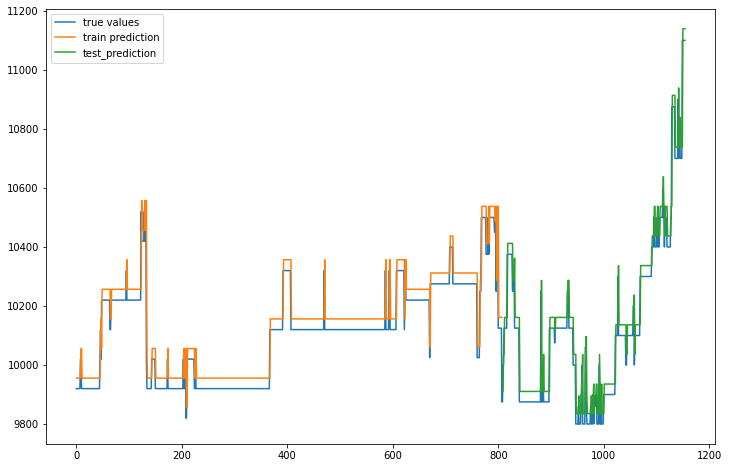

In [ ]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model51.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model51.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
train_prediction

array([[ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [10055.924],
       [10055.924],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [ 9955.58 ],
       [10055.924],
       [10156.268],
       [10055.924],
       [10256.611],
       [10256.611],


In [ ]:
test_prediction

array([[ 9910.426 ],
       [10035.855 ],
       [10035.855 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10412.145 ],
       [10412.145 ],
       [10412.145 ],
       [10412.145 ],
       [10412.145 ],
       [10412.145 ],
       [10412.145 ],
       [10412.145 ],
       [10412.145 ],
       [10412.145 ],
       [10286.715 ],
       [10286.715 ],
       [10286.715 ],
       [10361.973 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [10161.285 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910.426 ],
       [ 9910

In [13]:
model52 = Sequential()
model52.add(Dense(64, input_dim=look_back, activation='relu'))
model52.add(Dense(20, activation='relu'))
model52.add(Dense(20, activation='relu'))
model52.add(Dense(20, activation='relu'))
model52.add(Dense(1))
model52.compile(loss='mean_squared_error', optimizer='adam')
model52.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
404/404 - 2s - loss: 5583058.0000 - 2s/epoch - 6ms/step
Epoch 2/100
404/404 - 1s - loss: 2516.0703 - 1s/epoch - 3ms/step
Epoch 3/100
404/404 - 1s - loss: 2900.0161 - 1s/epoch - 3ms/step
Epoch 4/100
404/404 - 1s - loss: 2864.8037 - 897ms/epoch - 2ms/step
Epoch 5/100
404/404 - 1s - loss: 2961.9766 - 653ms/epoch - 2ms/step
Epoch 6/100
404/404 - 1s - loss: 3721.3062 - 628ms/epoch - 2ms/step
Epoch 7/100
404/404 - 1s - loss: 4539.9097 - 651ms/epoch - 2ms/step
Epoch 8/100
404/404 - 1s - loss: 4121.5337 - 671ms/epoch - 2ms/step
Epoch 9/100
404/404 - 1s - loss: 3962.5354 - 701ms/epoch - 2ms/step
Epoch 10/100
404/404 - 1s - loss: 3844.9697 - 651ms/epoch - 2ms/step
Epoch 11/100
404/404 - 1s - loss: 5974.5527 - 616ms/epoch - 2ms/step
Epoch 12/100
404/404 - 1s - loss: 4883.2310 - 637ms/epoch - 2ms/step
Epoch 13/100
404/404 - 1s - loss: 6005.6328 - 639ms/epoch - 2ms/step
Epoch 14/100
404/404 - 1s - loss: 5036.6758 - 622ms/epoch - 2ms/step
Epoch 15/100
404/404 - 1s - loss: 5432.2812 - 601

In [14]:
trainScore = model52.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model52.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

26/26 [==============================] - 0s 3ms/step - loss: 2954.2129
Train Score: 2954.21 MSE (54.35 RMSE)
11/11 [==============================] - 0s 5ms/step - loss: 5605.2520
Test Score: 5605.25 MSE (74.87 RMSE)
